## Replace this with your name and Section

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 4
Due 11/4/2024 by 5p

### Problem 1
Write a function ```greaterThan(A, lower_lim)``` that takes as an argument a numpy array A and a number lower_lim and returns an array with every entry less than or equal to lower_lim replaced by zero. That is to say, only the numbers strictly greater than lower_lim remain, the rest are 0.

In [1]:
import numpy as np

def greaterThan(A, lower_lim):
    return np.where(A <= lower_lim, 0, A)

In [2]:
A = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
B = np.array([[-1, 1], [2, -2], [0, 3]])
C = np.array([[101.1, 100, 99.9], [99.8, 100.1, 98.9], [103.2, 99, 98]])

assert np.all(greaterThan(A, 5) == np.array([0, 0, 0, 0, 0, 6, 7, 8, 9]))
assert np.all(greaterThan(B, 0) == np.array([[0, 1], [2, 0], [0, 3]]))
assert np.all(greaterThan(C, 100) == np.array([[101.1, 0, 0], [0, 100.1, 0], [103.2, 0, 0]]))

print("You passed all the tests!")

You passed all the tests!


### Problem 2
Write a function ```subtractMean(A)``` that takes as an input the numpy array and returns the array with the mean of all the values subtracted from every element.

In [3]:
def subtractMean(A):
    mean = np.mean(A)
    return A - mean

If the tests below aren't passing, check the values of A, B, and C. These should be the same as in the test for Problem 1. If the values in these arrays have changed, why might that be?

In [4]:
assert np.isclose(subtractMean(A), np.array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])).all()
assert np.isclose(subtractMean(B), np.array([[-1.5,  0.5],[ 1.5, -2.5],[-0.5,  2.5]])).all()
assert np.isclose(subtractMean(C), np.array([[ 1.1,  0. , -0.1],[-0.2,  0.1, -1.1],[ 3.2, -1. , -2. ]])).all()

print("You passed all the tests!")

You passed all the tests!


### Problem 3

Write a function ```arrayEdges``` that takes as an input an array and returns a 1-D array of all the elements on the edges of the array starting at the upper left corner and working around clockwise. Do not repeat that first element. If the original array is not 2-D, print('Error') and return -1.

*Hint*: Get the shape of the array as height and width, calculate the perimeter (remember not to double count the corners), and make an array of zeros the size of the perimeter. Then fill that array.

*Hint 2*: The length of the shape of a 2-D array is 2.

*Hint 3*: ```dA = A.dtype``` is the data type of A. ```np.zeros().astype(dA)``` creates an array of that type (if A has strings, this will make an array of '0').

In [5]:
def arrayEdges(A):
    if len(A.shape) != 2:
        print('Error')
        return -1
    
    rows, cols = A.shape
    perimeter = (rows - 2 + cols) * 2 # rows overlap so need to -2
    dA = A.dtype
    result = np.zeros(perimeter).astype(dA)

    result[0:cols] = A[0] # fill top row
    result[cols + rows - 2:2 * cols + rows - 2] = A[rows - 1][-1::-1] # fill bottom row
    if rows > 2: # fill sides there are more than 2 rows
        for i in range(rows - 2):
            result[cols + i] = A[1 + i][cols - 1]
        for i in range(rows - 2):
           result[2 * cols + rows - 2 + i] = A[1 + i][0]
    return result

In [6]:
'''Test your code'''

X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
Y = np.array([['you', 'got', 'this'],['!','correct','problem']])
Z = np.array(['but','this','wont', 'work'])

assert np.array(arrayEdges(X) == np.array([1, 2, 3, 6, 9, 8, 7, 4])).all()
assert np.array(arrayEdges(Y) == np.array(['you', 'got', 'this', 'problem', 'correct', '!'])).all()
assert arrayEdges(Z) == -1

print("You passed all the tests! (disregard that it says Error above...it's supposed to do that)")

Error
You passed all the tests! (disregard that it says Error above...it's supposed to do that)


## Palmer's Penguins

Below I've imported the Palmer's Penguins dataset, courtesy of Alison Horst's github. Fill in the blanks in Problem 4. You should add code cells below to write code to find the answers.

In [7]:
import pandas as pd

pp_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv')
pp_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


### Problem 4

 1. How many penguins were recorded? 

  - 344 penguins were recorded, with 2 not having any stats besides a year.

 2. In terms of body mass, how big were the smallest and biggest penguins measured?

  - The penguin at index 314 has the smallest body mass of 2700g.
  - The penguin at index 169 has the largest body mass of 6300g.

 3. What species of penguins were recorded and how many of each?

 - The first species is Adelie, and 152 penguins of that species are recorded.
 - The second species is Gentoo, and 124 penguins of that species are recorded.
 - The third species is Chinstrap, and 68 penguins of that species are recorded.

In [8]:
# 1
display(pp_df) # 344 rows for 344 penguins
filtered_data = pp_df.loc[pp_df['bill_length_mm'].isna(), 'bill_length_mm']
display(filtered_data)
# display(pp_df["year"][271]) # check all columns for idx 3 and 271

# 2
display(pp_df.describe())
display(pp_df.query('body_mass_g == 2700')) # find data of penguin with smallest body mass
display(pp_df.query('body_mass_g == 6300')) # find data of penguin with largest body mass

# 3
display(pp_df['species'].unique())
display(pp_df.query('species == "Adelie"'))
display(pp_df.query('species == "Gentoo"'))
display(pp_df.query('species == "Chinstrap"'))

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


3     NaN
271   NaN
Name: bill_length_mm, dtype: float64

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
314,Chinstrap,Dream,46.9,16.6,192.0,2700.0,female,2008


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
169,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,male,2007


array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,female,2009
148,Adelie,Dream,36.0,17.8,195.0,3450.0,female,2009
149,Adelie,Dream,37.8,18.1,193.0,3750.0,male,2009
150,Adelie,Dream,36.0,17.1,187.0,3700.0,female,2009


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
152,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,female,2007
153,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,male,2007
154,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,female,2007
155,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,male,2007
156,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,male,2007
...,...,...,...,...,...,...,...,...
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009
272,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female,2009
273,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male,2009
274,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female,2009


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
276,Chinstrap,Dream,46.5,17.9,192.0,3500.0,female,2007
277,Chinstrap,Dream,50.0,19.5,196.0,3900.0,male,2007
278,Chinstrap,Dream,51.3,19.2,193.0,3650.0,male,2007
279,Chinstrap,Dream,45.4,18.7,188.0,3525.0,female,2007
280,Chinstrap,Dream,52.7,19.8,197.0,3725.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### Problem 5

Plot a histogram of the body masses of penguins grouped by species. Make sure to include a title, axis labels, and a legend.

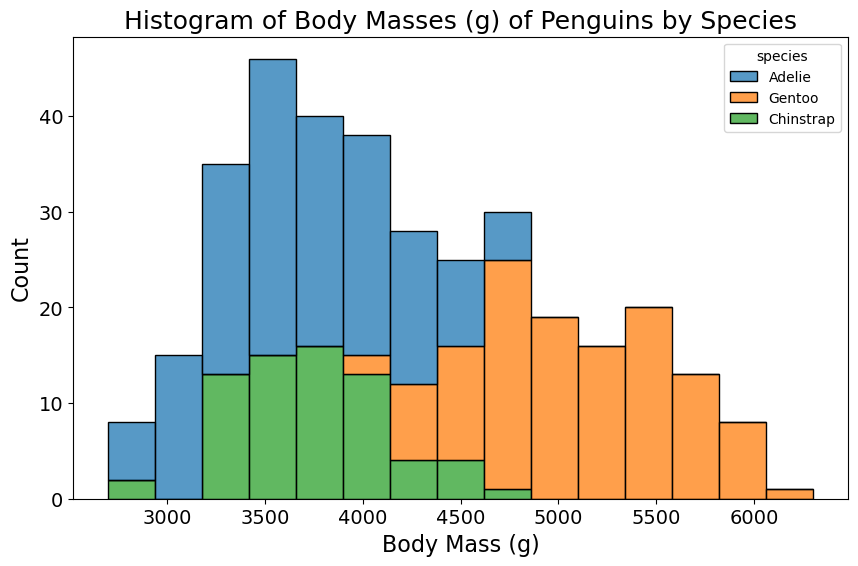

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

pp_df = pp_df.loc[~pp_df['bill_length_mm'].isna()]

# Plot the histogram grouped by species
plt.figure(figsize=(10, 6))

# Create the histogram with 'species' as the hue to group by species
sns.histplot(data=pp_df, x='body_mass_g', hue='species', multiple="stack", kde=False, bins=15)

# Add title and labels
plt.title('Histogram of Body Masses (g) of Penguins by Species', fontsize=18)
plt.xlabel('Body Mass (g)', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
plt.show()

### Challenge Problem

Write a function ```interleaveArrays``` that takes as arguments two numpy arrays A and B and return a new numpy array with the rows of A and B interleaved, starting with A. If you run out of rows from one matrix or the other complete the array with the remaining rows of the longer array.

If the two arrays do not have the same number of columns, print('Error: Shapes of arrays are not compatible.') and return -1
If the two arrays contain different data types, print('Error: Types of arrays are not compatible.') and return -2

Example:

```
G = np.array([[1, 2, 3], [4, 5, 6]])
H = np.array([[10, 20, 30], [100, 200, 300], [1000, 2000, 3000]])

interleave(G,H)
```
returns
```
array([[1,2,3], [10,20,30], [4, 5, 6], [100, 200, 300], [1000, 2000, 3000]])
```